The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [75]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  # Added import for matplotlib.pyplot

In [76]:
# 1. Load the dataset and find the most common gender and birth country
nobel_data = pd.read_csv("data/nobel.csv")
print(nobel_data.head())
print(nobel_data.info())
# Find the most common gender and birth country
top_gender = nobel_data['sex'].value_counts().index[0]
top_country = nobel_data['birth_country'].value_counts().index[0]

print(top_gender)
print(top_country)

   year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city      

    decade  US_winner
0     1900   0.017544
1     1910   0.075000
2     1920   0.074074
3     1930   0.250000
4     1940   0.302326
5     1950   0.291667
6     1960   0.265823
7     1970   0.317308
8     1980   0.319588
9     1990   0.403846
10    2000   0.422764
11    2010   0.314050
12    2020   0.360000
The decade with the highest US-born winner ratio is: 2000


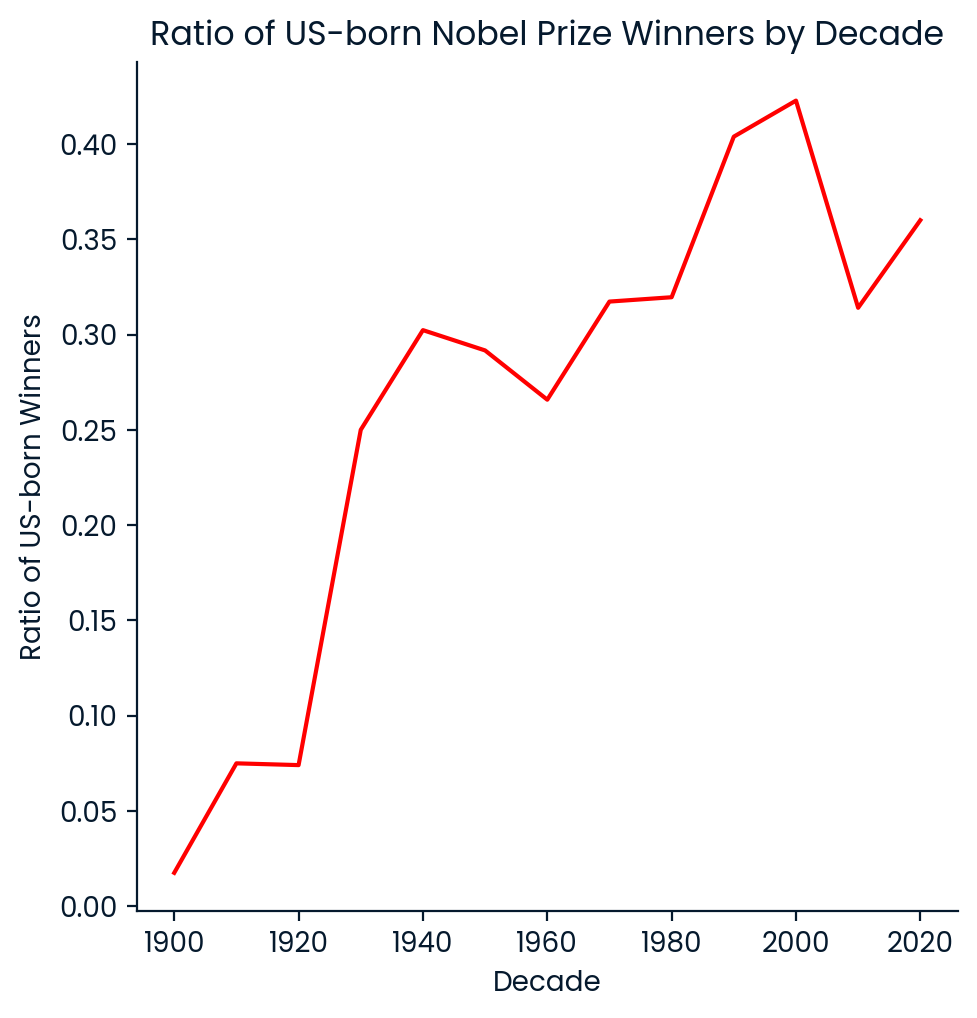

In [77]:
# 2. Identify the decade with the highest ratio of US-born winners
# Create the US-born winners column
nobel_data['US_winner'] = nobel_data['birth_country'] == 'United States of America'
# Create the decade column
nobel_data['decade'] = (np.floor(nobel_data['year'] / 10) * 10).astype(int)

# Step 3: Finding the ratio
us_winner_decade = nobel_data.groupby('decade', as_index=False)['US_winner'].mean()

print(us_winner_decade)

# Step 4: Identify the decade with the highest ratio of US-born winners
max_ratio = us_winner_decade['US_winner'].max()
max_decade_usa = us_winner_decade[us_winner_decade['US_winner'] == max_ratio]['decade'].values[0]
print(f"The decade with the highest US-born winner ratio is: {max_decade_usa}")

# Step 5: Create a relational line plot
sns.relplot(x="decade", y="US_winner", kind="line", data=us_winner_decade, color="red")
plt.title('Ratio of US-born Nobel Prize Winners by Decade')
plt.ylabel('Ratio of US-born Winners')
plt.xlabel('Decade')
plt.show()

   decade    category    Female
0    1900   Chemistry  0.000000
1    1900  Literature  0.100000
2    1900    Medicine  0.000000
3    1900       Peace  0.071429
4    1900     Physics  0.076923
    decade    category
68    2020  Literature
{2020: 'Literature'}
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-

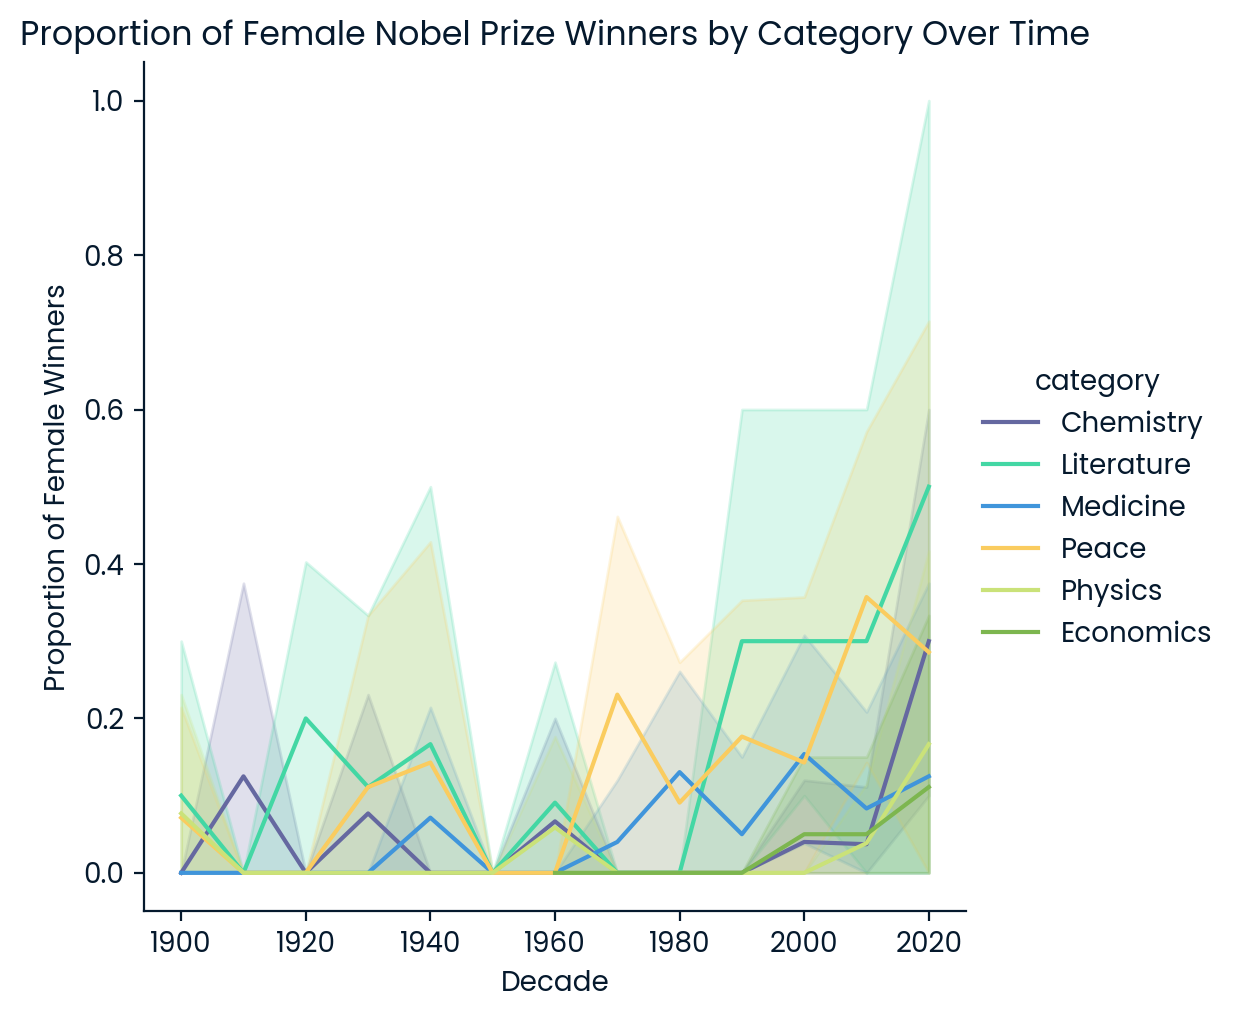

In [78]:
# 3. Find the decade and category with the highest proportion of female laureates
# Step 1. Filtering for female winners
nobel_data["Female"] = nobel_data["sex"] == "Female"

# Step 2. Group by two columns
female_winner = nobel_data.groupby(['decade', 'category'], as_index=False)['Female'].mean()
print(female_winner.head())

# Step 3. Find the decade and category with the highest female winners
max_female = female_winner['Female'].max()
max_female_ratio = female_winner[female_winner['Female'] == max_female][['decade','category']]
print(max_female_ratio)

# Step 4. Create a dictionary
max_female_dict = {max_female_ratio['decade'].values[0]: max_female_ratio['category'].values[0]}
print(max_female_dict)

print(nobel_data.info())

sns.relplot(x="decade", y="Female", data=nobel_data, hue="category", kind="line")
plt.title('Proportion of Female Nobel Prize Winners by Category Over Time')
plt.ylabel('Proportion of Female Winners')
plt.xlabel('Decade')
plt.show()

In [79]:
#4. Find first woman to win a Nobel Prize

# Step 1. Filter a DataFrame 
female_filter = nobel_data[nobel_data['sex'] == "Female"]

# Step 2. Find the minimum value in a column
min_year = female_filter['year'].min()
min_row = female_filter[female_filter['year'] == min_year]

print(min_row[['year', 'category', 'sex', 'full_name']])

    year category     sex                    full_name
19  1903  Physics  Female  Marie Curie, née Sklodowska


In [80]:
#5. Determine repeat winners

# Step 1. Count the values in a column
name_counts = nobel_data['full_name'].value_counts()

# Step 2. Finding counts of two or more
repeated_names = name_counts[name_counts >= 2].index
repeated_winners = nobel_data[nobel_data['full_name'].isin(repeated_names)]

print(repeated_winners[['year', 'category', 'sex', 'full_name']])

     year   category     sex                                          full_name
19   1903    Physics  Female                        Marie Curie, née Sklodowska
62   1911  Chemistry  Female                        Marie Curie, née Sklodowska
89   1917      Peace     NaN  Comité international de la Croix Rouge (Intern...
215  1944      Peace     NaN  Comité international de la Croix Rouge (Intern...
278  1954  Chemistry    Male                                 Linus Carl Pauling
283  1954      Peace     NaN  Office of the United Nations High Commissioner...
298  1956    Physics    Male                                       John Bardeen
306  1958  Chemistry    Male                                   Frederick Sanger
340  1962      Peace    Male                                 Linus Carl Pauling
348  1963      Peace     NaN  Comité international de la Croix Rouge (Intern...
424  1972    Physics    Male                                       John Bardeen
505  1980  Chemistry    Male            